In [1]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
from matplotlib.lines import Line2D
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [2]:
with open("simu3_data/simu3_design.pkl", 'rb') as inp:
    df = pickle.load(inp)
df = df.loc[df.session < 300]
df

,position,session,testidx,lag,type,study_itemno1,study_itemno2,test_itemno1,test_itemno2
0,0,0,147,0,no_fit,708,1244,664,972
1,1,0,151,0,no_fit,751,680,339,1537
2,2,0,156,0,no_fit,823,1591,1298,1393
3,3,0,17,0,no_fit,880,1325,226,1545
4,4,0,90,0,no_fit,51,1505,603,433
...,...,...,...,...,...,...,...,...,...
47995,155,299,147,8,single_old,1357,1635,1151,-1
47996,156,299,150,6,pair_new,1195,508,597,175
47997,157,299,153,4,pair_new,919,446,1406,613
47998,158,299,152,6,pair_old,330,1308,1406,1327


### Run CMR-IA

In [3]:
s_mat = np.load('../../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [4]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.1,
    beta_cue = 0.4,
    beta_rec_post = 0.1,
    gamma_fc = 0.1,
    s_fc = 0.1,
    c_thresh_itm = 0.22,
    c_thresh_ass = 0.285,
    d_ass = 0.8,
)
params

{'beta_enc': 0.1,
 'beta_rec': 0.5,
 'beta_cue': 0.4,
 'beta_rec_post': 0.1,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.1,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.5,
 'c_thresh_itm': 0.22,
 'c_thresh_ass': 0.285,
 'd_ass': 0.8,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.1,
 'gamma_cf': 0.5,
 'use_new_context': False}

In [5]:
# pos_b = np.arange(0,1,0.05)
# csim_old = []
# csim_new = []
# for b in pos_b:
#     # print(b)
#     params.update(beta_enc = b)
#     df_simu = cmr.run_hockley_recog_multi_sess(params,df,s_mat)
#     df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
#     old = df_simu.loc[df_simu.type == 1].csim.mean()
#     new = df_simu.loc[df_simu.type == 0].csim.mean()
#     csim_old.append(old)
#     csim_new.append(new)
# df_tmp = pd.DataFrame(data = {'b':pos_b, 'old':csim_old, 'new':csim_new})
# sns.lineplot(data=df_tmp, x='b', y='old', linewidth=2)
# sns.lineplot(data=df_tmp, x='b', y='new', linewidth=2)

In [6]:
df_simu = cmr.run_conti_recog_multi_sess(params, df, s_mat, mode="Hockley")
df_simu

100%|██████████| 300/300 [01:38<00:00,  3.04it/s]

CMR Time: 98.86263084411621


,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim
0,0,0,708,1244,664,972,0.0,61.688370,0.029236
1,0,1,751,680,339,1537,0.0,222.844391,0.093455
2,0,2,823,1591,1298,1393,0.0,389.694031,0.121399
3,0,3,880,1325,226,1545,0.0,647.052734,0.146753
4,0,4,51,1505,603,433,0.0,896.253723,0.163042
...,...,...,...,...,...,...,...,...,...
47995,299,155,1357,1635,1151,-1,1.0,678.459961,0.290877
47996,299,156,1195,508,597,175,1.0,559.506104,0.300516
47997,299,157,919,446,1406,613,0.0,2421.397949,0.212736
47998,299,158,330,1308,1406,1327,1.0,226.066208,0.345827


In [7]:
df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,testidx,lag,type
0,0,0,708,1244,664,972,0.0,61.688370,0.029236,147,0,no_fit
1,0,1,751,680,339,1537,0.0,222.844391,0.093455,151,0,no_fit
2,0,2,823,1591,1298,1393,0.0,389.694031,0.121399,156,0,no_fit
3,0,3,880,1325,226,1545,0.0,647.052734,0.146753,17,0,no_fit
4,0,4,51,1505,603,433,0.0,896.253723,0.163042,90,0,no_fit
...,...,...,...,...,...,...,...,...,...,...,...,...
47995,299,155,1357,1635,1151,-1,1.0,678.459961,0.290877,147,8,single_old
47996,299,156,1195,508,597,175,1.0,559.506104,0.300516,150,6,pair_new
47997,299,157,919,446,1406,613,0.0,2421.397949,0.212736,153,4,pair_new
47998,299,158,330,1308,1406,1327,1.0,226.066208,0.345827,152,6,pair_old


In [8]:
df_simu.groupby(['type','lag']).csim.mean()

type        lag
no_fit      0      0.166794
pair_new    2      0.280373
            4      0.274598
            6      0.272495
            8      0.268822
            16     0.250999
pair_old    2      0.330182
            4      0.319536
            6      0.311503
            8      0.306837
            16     0.292136
single_new  2      0.168778
            4      0.168965
            6      0.169538
            8      0.170690
            16     0.168702
single_old  2      0.282867
            4      0.265550
            6      0.253162
            8      0.247941
            16     0.227638
Name: csim, dtype: float64

### PLOT

In [9]:
df_laggp = df_simu.groupby(['type','lag']).s_resp.mean().to_frame(name='yes_rate').reset_index()
df_laggp['no_rate'] = 1 - df_laggp['yes_rate'] 
df_laggp

,type,lag,yes_rate,no_rate
0,no_fit,0,0.094812,0.905188
1,pair_new,2,0.388964,0.611036
2,pair_new,4,0.332059,0.667941
3,pair_new,6,0.322893,0.677107
4,pair_new,8,0.308159,0.691841
5,pair_new,16,0.198669,0.801331
6,pair_old,2,0.836148,0.163852
7,pair_old,4,0.730327,0.269673
8,pair_old,6,0.672627,0.327373
9,pair_old,8,0.628910,0.371090


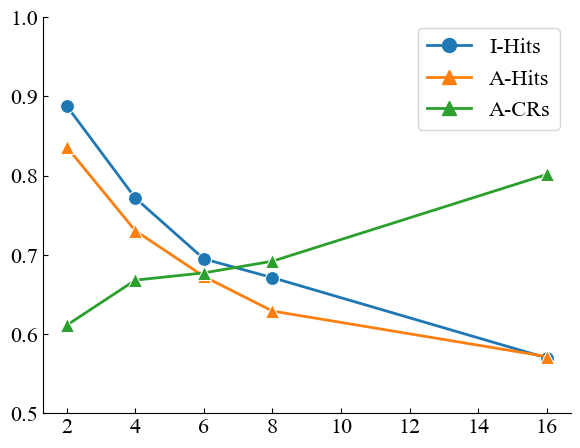

In [10]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_laggp.loc[df_laggp.type == 'single_old'], x='lag', y='yes_rate', linewidth=2, marker='o', markersize = 10, label='I-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 'pair_old'], x='lag', y='yes_rate', linewidth=2, marker='^', markersize = 10, label='A-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 'pair_new'], x='lag', y='no_rate', linewidth=2, marker='^', markersize = 10, label='A-CRs')
plt.ylim([0.5,1])
plt.xlabel('Test Lag')
plt.ylabel('Proportion Correct')
ax.set(xlabel=None, ylabel=None)
plt.xticks(ticks=np.arange(2,18,2))
# plt.tick_params(labelleft=False)
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='-',label = 'I-Hits'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='^', markersize = 10, linestyle='-', label = 'A-Hits'),
                   Line2D([0], [0], color = sns.color_palette()[2], lw=2, marker='^', markersize = 10, linestyle='-', label = 'A-CRs')]
plt.legend(handles = legend_elements)

# plt.savefig('simu3_fig/simu3_hr.pdf')
plt.show()

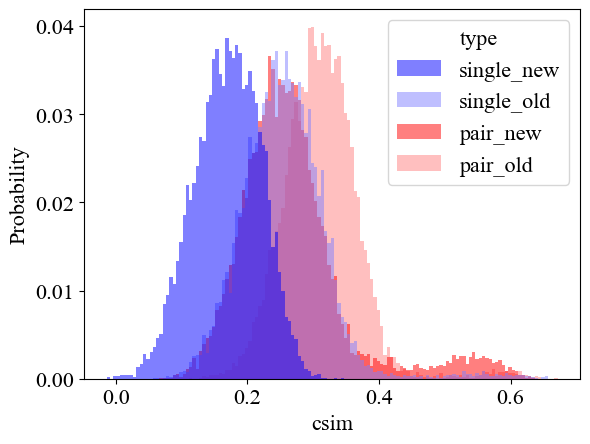

In [12]:
sns.histplot(data=df_simu, x="csim", hue = "type", hue_order = ['single_new', 'single_old', 'pair_new', 'pair_old'], palette = [[0,0,1],[0.5,0.5,1],[1,0,0],[1,0.5,0.5]], stat = "probability", binwidth = 0.005, common_norm=False, edgecolor = None)
# plt.savefig('fig/simu3_csim.pdf')
plt.show()

In [18]:
df_dprime = pd.DataFrame()
df_dprime['lag'] = [2,4,6,8,16]
df_dprime['I_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 'single_old', 'yes_rate'].astype(float))
df_dprime['I_z_far'] = sp.stats.norm.ppf(np.mean(df_laggp.loc[df_laggp.type == 'single_new', 'yes_rate'].astype(float)))
df_dprime['I_dprime'] = df_dprime['I_z_hr'] - df_dprime['I_z_far']
df_dprime['A_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 'pair_old', 'yes_rate'].astype(float))
df_dprime['A_z_far'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 'pair_new', 'yes_rate'].astype(float))
df_dprime['A_dprime'] = df_dprime['A_z_hr'] - df_dprime['A_z_far']
df_dprime

,lag,I_z_hr,I_z_far,I_dprime,A_z_hr,A_z_far,A_dprime
0,2,1.215598,-0.972775,2.188373,0.978749,-0.282021,1.260770
1,4,0.744000,-0.972775,1.716775,0.613801,-0.434234,1.048036
2,6,0.509350,-0.972775,1.482125,0.447179,-0.459625,0.906804
3,8,0.442805,-0.972775,1.415580,0.328968,-0.501077,0.830045
4,16,0.175654,-0.972775,1.148429,0.180012,-0.846384,1.026397


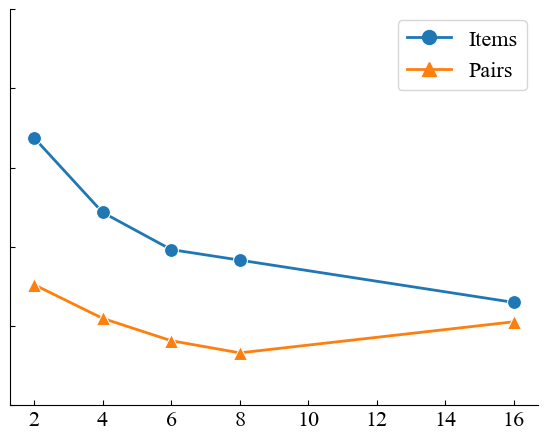

In [19]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_dprime, x='lag', y='I_dprime', linewidth=2, marker='o', markersize = 10, label='Items')
sns.lineplot(data=df_dprime, x='lag', y='A_dprime', linewidth=2, marker='^', markersize = 10, label='Pairs')
# plt.ylabel("$d^'$")
# plt.xlabel('Test Lag')
ax.set(xlabel=None, ylabel=None)
plt.ylim([0.5,3])
plt.xticks(ticks=np.arange(2,18,2))
plt.tick_params(labelleft=False)
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='-',label = 'Items'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='^', markersize = 10, linestyle='-', label = 'Pairs')]
plt.legend(handles = legend_elements)

# plt.savefig('simu3_fig/simu3_dprime.pdf')
plt.show()

In [20]:
# get the vectors
I_hr = df_laggp.loc[df_laggp.type == 'single_old', "yes_rate"].to_numpy()
I_far = np.mean(df_laggp.loc[df_laggp.type == 'single_new', 'yes_rate'].astype(float))
A_hr = df_laggp.loc[df_laggp.type == 'pair_old', "yes_rate"].to_numpy()
A_far = df_laggp.loc[df_laggp.type == 'pair_new', "yes_rate"].to_numpy()
# I_dprime = df_dprime['I_dprime'].to_numpy()
# A_dprime = df_dprime['A_dprime'].to_numpy()

# ground truth
I_hr_gt = np.array([0.865, 0.811, 0.752, 0.746, 0.708])
I_far_gt = 0.12
A_hr_gt = np.array([0.843, 0.787, 0.720, 0.735, 0.646])
A_far_gt = np.array([0.406, 0.371, 0.285, 0.259, 0.202])
# I_dprime_gt = np.array([2.31, 2.05, 1.85, 1.84, 1.68])
# A_dprime_gt = np.array([1.36, 1.29, 1.37, 1.58, 1.39])

# calculate the error
# err = np.mean(np.power(I_hr - I_hr_gt,2)) + np.mean(np.power(A_hr - A_hr_gt,2)) \
#     + np.mean(np.power(I_dprime - I_dprime_gt,2)) + np.mean(np.power(A_dprime - A_dprime_gt,2))
err = np.mean(np.power(I_hr - I_hr_gt, 2)) + np.mean(np.power(A_hr - A_hr_gt, 2)) \
    + np.power(I_far - I_far_gt, 2) * 5 + np.mean(np.power(A_far - A_far_gt, 2))
err

0.021892895811959957

In [21]:
I_hr, I_far, A_hr, A_far

(array([0.88793103, 0.77156177, 0.69474638, 0.67104646, 0.5697173 ]),
 0.16533256822429412,
 array([0.83614788, 0.73032674, 0.67262724, 0.62890995, 0.57142857]),
 array([0.38896366, 0.33205925, 0.32289268, 0.30815851, 0.1986692 ]))